<a href="https://colab.research.google.com/github/gmazzitelli/GSN2/blob/master/plot_google_sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns
sns.set()
#plt.style.use('fast')
#plt.rc('font', size = 14, family ='Sans-Serif')
def panda_from_gspreadsheet(key, sheet_name='Sheet1', header=0):
  # google spredsheet TO panda dataframe 
  # ricordarsi di abilitare lo sharing pubblico dei dati
  url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
      key=key, sheet_name=sheet_name.replace(' ', '%20'))
  return pd.read_csv(url, header=header)
"""
# DATI COVID Nazionali https://github.com/pcm-dpc/COVID-19
# download updated data
# repository italy https://github.com/pcm-dpc/COVID-19/tree/master/dati-andamento-nazionale
url_csv_file = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(url_csv_file)
# DATI COVID REGIONI
# istat http://dati.istat.it/Index.aspx?QueryId=26428#
url_csv_file = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
dr = pd.read_csv(url_csv_file)
Lombardia = dr.loc[(dr['denominazione_regione'] == 'Lombardia')].sort_values(by="data").copy()
Lazio = dr.loc[(dr['denominazione_regione'] == 'Lazio')].sort_values(by="data").copy()
Italia = df.copy() 
# DATI Popolazione Regioni
# 
dpr = panda_from_gspreadsheet('1qL5B_J6eV6bD9zicR0YsCIaUMU0BhTdSTrqC1UcDBI8', sheet_name='Sheet1')
# DATI COVID Provincie
url_csv_file = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv"
dp = pd.read_csv(url_csv_file)
pr =  panda_from_gspreadsheet('1Hf3s74TRWnhLkKYOM3XOdFwqyZEuxkl0Rxx8xjLmeZs', sheet_name='Sheet1')
"""

#https://docs.google.com/spreadsheets/d/1MWRb1xbkpZOmUBLCLaC9ud4htvPEWYC7F8IuTt84YBg/edit?usp=sharing
pd =  panda_from_gspreadsheet('1MWRb1xbkpZOmUBLCLaC9ud4htvPEWYC7F8IuTt84YBg', sheet_name='Sheet1')

def Exp(x, p0, p1): # negative exponential
    import numpy as np
    return p0*np.exp(x/p1)
 
def Infected(t, I0, mu, R0): # negative exponential
    import numpy as np
# https://medium.com/data-for-science/epidemic-modeling-101-or-why-your-covid19-exponential-fits-are-wrong-97aa50c55f8
    return I0*np.exp(mu*(R0-1)*t)
 
# def Logistic(x, L, k, x0):
#     import numpy as np
#     return L / (1. + np.exp(-k * (x - x0)))
 
def Logistic(x, a, b, c):
    import numpy as np
# https://it.wikipedia.org/wiki/Equazione_logistica
    return a / (1. + b * np.exp(-c * x))
 
def Logistic4(x, a, b, c, d):
    import numpy as np
# https://it.wikipedia.org/wiki/Equazione_logistica
    return a / (1. + b * np.exp(-c * x)) + d
 
def dLogistic(x, a, b, c):
    import numpy as np
    return a*b*c*np.exp(c*x)/(b+np.exp(c*x))**2
 
def Gompertz(x, a, b, c):
    import numpy as np
# https://en.wikipedia.org/wiki/Gompertz_function
    return a * np.exp(-b * np.exp(-c * x))
 
def dGompertz(x, a, b, c):
  import numpy as np
# https://en.wikipedia.org/wiki/Gompertz_function
  return a*b*c * np.exp(-b * np.exp(-c * x))*np.exp(-c * x)
 
def Gauss3(x, a0, x0, s0):
    import numpy as np
    return a0 * np.exp(-(x - x0)**2 / (2 * s0**2))
 
def Line(x, m, q):
    import numpy as np
    return m*x + q
 
def ManSdtSubArr(arr, rescaled_avarege):
  import numpy as np
  if len(arr)>rescaled_avarege & rescaled_avarege>1:
    a_split     = np.array_split(arr, int(len(arr)/rescaled_avarege))
    a_split_avg = [np.mean(x) for x in a_split]
    a_split_err = [np.std(x) for x in a_split]
    x = np.linspace(0, len(a_split_avg)*rescaled_avarege, len(a_split_avg))
    return x, np.array(a_split_avg), np.array(a_split_err)
  else:
    x = np.linspace(0, len(arr)*rescaled_avarege, len(arr))
    return x, np.array(arr), np.sqrt(arr)
    
def fittalo(func, x, y, ax, p0, fmt='k'):
  from scipy.optimize import curve_fit
  from sklearn.metrics import r2_score
  popt, pcov = curve_fit(func,x, y, p0=p0)
  perr = np.sqrt(np.diag(pcov))
  r2=r2_score(y, func(x, *popt))
  xf = np.linspace(x.min(), x.max(), 100)
  ax.plot(xf, func(xf, *popt), fmt, label='a = {0:.2e}±{1:.2e}\nb = {2:.2e}±{3:.2e} \
  \nc = {4:.2e}±{5:.2e}\nr^2 = {6:.3f}'.format(popt[0], perr[0], popt[1], perr[1], popt[2], perr[2], r2))
  return ax, popt
 
def Rth(data, N=7, d=4):
  # https://www.facebook.com/DatiAnalisiCoronavirus/posts/142436764043174?__tn__=K-R
  # faq ISS https://www.iss.it/primo-piano/-/asset_publisher/o4oGR9qmvUz9/content/faq-sul-calcolo-del-rt
  y = np.convolve(data, np.ones((N,))/N, mode='valid')
  x = np.linspace(0, len(y), len(y))
  return x[d:] , y[d:]/y[:-d]

In [104]:
pd.tail()

,Timestamp,Email Address,Experiment,DAQ type,Data organization,DAQ/MC rate events/y,Data amount,size KB,Data size,Data structure,...,Tape - size,Tape - access frequency,Tape - inventory,Tape - replicas and backups,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
25,5/2/2022 16:13:09,valerio.formato@roma2.infn.it,AMS-02,triggered,By event,1.700000e+10,"~18*10^9 events/y real, ~4^12 events/y MC",1.0,~1k / ev,3 + 4,...,"~1PB, same as before.",Close to 0%. Tape is intended as an archive.,100%,These are indeed replicas of the data stored a...,NaN,NaN,NaN,NaN,NaN,NaN
26,5/3/2022 11:48:25,federico.dipierro@to.infn.it,CTA,triggered,by event,1.040000e+09,Current (2022) data production: 1 telescope ta...,8000.0,100 kB,"RAW, DL0, DL1, DL2, DL3, MC",...,500 TB,A = 0,B = 1,No,NaN,NaN,NaN,NaN,NaN,NaN
27,5/3/2022 15:00:28,aldo.ianni@lngs.infn.it,SABRE,quasi triggered,by event,6.200000e+03,MC generated 1e10. Real events in the ROI 6200...,1700000.0,Order of 0.7 GByte for physics run. Order of 1...,raw(real + MC) + calibrated + filtered (after ...,...,At least 120 TB,,,Yes. Yes for a good fraction at present.,NaN,NaN,NaN,NaN,NaN,NaN
28,5/5/2022 16:28:43,matteo.merge@roma2.infn.it,CSES-LIMADOU,triggered,by event,1.000000e+09,~1.0x10^9 events/year,2.0,~2kB/event (~ 2.0TB/year),"raw, level0 (root format of raw data), level1 ...",...,8TB is the current pledge @CNAF for HEPD-01 ra...,No frequent tape accesses are forseen,"All the stored data on tape at CNAF are a ""mas...",There are replicas of tape data ASI-SSDC and I...,NaN,NaN,NaN,NaN,NaN,NaN
29,5/5/2022 18:04:09,bagnasco@to.infn.it,Virgo,streaming,"h(t) (""strain"") time series sampled at 10kHz, ...",3.150000e+04,About 2PB of raw data per year of observation....,634000000.0,The basic units for offline processing are fil...,Full bandwidth raw (not saved); Bulk raw (down...,...,~4PB,~0%,~100%,CNAF storage is considered custodial for Virgo...,NaN,NaN,NaN,NaN,NaN,NaN


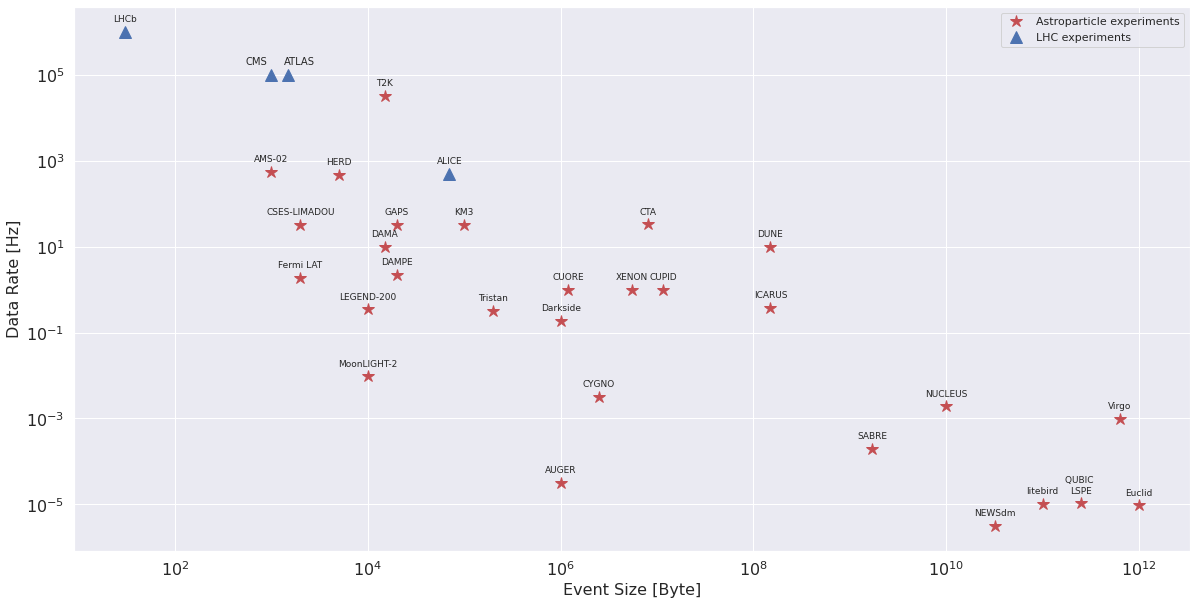

In [110]:
fig, ax = plt.subplots(figsize=(20,10))
lhc_experiment = np.array(["ATLAS", "CMS", "LHCb", "ALICE"])
lhc_size = np.array([1.5e3,1e3,30,70e3])
lhc_rate = np.array([1e5,1e5,1e6,500])
x = pd["size KB"]*1e3
y = pd["DAQ/MC rate events/y"]/3.154e+7
z = pd["DAQ type"]
# [z if x=="triggered" else x for x in z]
ax.plot(x, y , 'r*', markersize=12, label="Astroparticle experiments")
ax.plot(lhc_size, lhc_rate , 'b^', markersize=12, label="LHC experiments")
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Event Size [Byte]", size = 16)
ax.set_ylabel("Data Rate [Hz]", size = 16)

for i, lab in enumerate(pd["Experiment"]):
    d = 0.7 # 1.2 if i%2 == 0 else 1.1
    plt.annotate(lab, (x[i],y[i]+(y[i]*d)), ha='center', size=9) 


plt.annotate(lhc_experiment[0], (lhc_size[0]+lhc_size[0]*0.3,lhc_rate[0]+(lhc_rate[0]*0.7)), ha='center', size=10) 
plt.annotate(lhc_experiment[1], (lhc_size[1]-lhc_size[1]*0.3,lhc_rate[1]+(lhc_rate[1]*0.7)), ha='center', size=10) 
plt.annotate(lhc_experiment[2], (lhc_size[2],lhc_rate[2]+(lhc_rate[2]*0.7)), ha='center', size=9) 
plt.annotate(lhc_experiment[3], (lhc_size[3],lhc_rate[3]+(lhc_rate[3]*0.7)), ha='center', size=9) 

# for i, lab in enumerate(lhc_experiment):
#     d = -0.3 if i%2 == 0 else 0.3
#     plt.annotate(lab, (lhc_size[i]+lhc_size[i]*d,lhc_rate[i]-(lhc_rate[i]*0.7)), ha='center', size=9) 

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend()
plt.show()

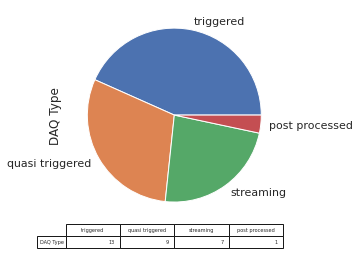

In [106]:
pd.value_counts(pd["DAQ type"]).plot(kind='pie', table=True, label="DAQ Type")
plt.show()

In [107]:
i=2
i%2

0

In [108]:
d = -1.1 if i%2 == 0 else 1.1

In [109]:
d

-1.1